<h1 style="font-size:30px;">Logical Operations</h1>

Logical operations are often used with binary masks to process selective portions of an image. In this notebook we will cover:

* Introduction to logical operators
* Bitwise operations on images: AND, NOT, OR, XOR
* Logo manipulation example

# 1. Introduction to Logical  Operations

The following table summarizes the four logical operators that will be covered in this notebook. The output of each operator for input combinations `A` and `B` are also shown. The values for `A` and `B` are either `0` or `1` because these logical operators will be performed on the bits that are used to represent pixel intensities.

![Binary-Operators](https://opencv.org/wp-content/uploads/2021/08/c0-m2-binary-operator-table.png)

### <font style="color:rgb(50,120,230)">Binary Notation</font>
The following examples show how the intensity of 255 (white), 42 (dark gray), and 0 (black) are represented as binary numbers:  `11111111`, `00101010`, and `00000000`, respectively. These are 8-bit unsigned integer representations and we will be using this notation when working with logical operators. As you can see, 255 is the largest number that can be represented with an 8-bit unsigned integer.

![Binary-notations](https://opencv.org/wp-content/uploads/2021/08/c0-m2-binary-notation.png)

### <font style="color:rgb(50,120,230)">Binary Operation Examples</font>
Here are four examples of how the logical `AND` and `OR` operators are applied to unsigned 8-bit integers. In these examples, we are exploring the logical operations on pixel intensities of 0, 42, and 255 (i.e., black, dark gray, and white). 

![And-OR](https://opencv.org/wp-content/uploads/2021/08/c0-m2-binary-and-or-tables-4.png)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/f8ae3j0nbrflife/AAAy-WwcREtWOGgoEbFLDPANa?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
else:
    pass

# 2. Bitwise Operations on Images

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font color="green">Function Syntax</font>

Example API for **`bitwise_and()`**. Others include: **`bitwise_not()`**, **`bitwise_or()`**, **`bitwise_xor()`** 

``` python
dst = cv2.bitwise_and( src1, src2[, dst[, mask]] )
```

`dst`: Output array that has the same size and type as the input arrays.

The function has **2 required arguments**:

1. `src1`:	first input array or a scalar.
2. `src2`:	second input array or a scalar.

An important optional argument is:

1. `mask`:	optional operation mask, 8-bit single channel array, that specifies elements of the output array to be changed.


### <font color="green">OpenCV Documentation</font>

[**`bitwise_and()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14)
[**`bitwise_not()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga0002cf8b418479f4cb49a75442baee2f)
[**`bitwise_or()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#gab85523db362a4e26ff0c703793a719b4)
[**`bitwise_xor()`**](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga84b2d8188ce506593dcc3f8cd00e8e2c)

[**Arithmetic Operations Tutorial**](https://docs.opencv.org/4.5.2/d0/d86/tutorial_py_image_arithmetics.html)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Read and display input images</font>

(200, 499)


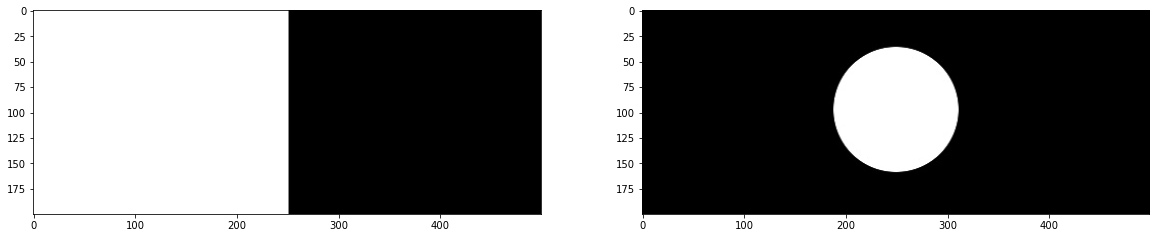

In [ ]:
img_rec = cv2.imread('rectangle.jpg', cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread('circle.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = [20,5])
plt.subplot(121);  plt.imshow(img_rec);
plt.subplot(122);  plt.imshow(img_cir);
print(img_rec.shape)

### <font style="color:rgb(50,120,230)">Bitwise AND Operator </font>
The `bitwise_and()` function will return 

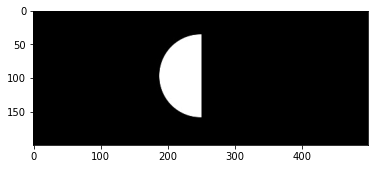

In [ ]:
result = cv2.bitwise_and(img_rec, img_cir, mask = None)

plt.imshow(result);

### <font style="color:rgb(50,120,230)">Bitwise OR Operator </font>

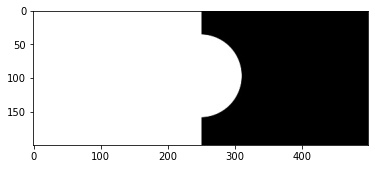

In [ ]:
result = cv2.bitwise_or(img_rec, img_cir, mask = None)
plt.imshow(result);

### <font style="color:rgb(50,120,230)">Bitwise XOR Operator </font>

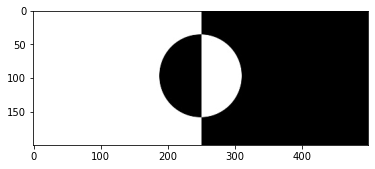

In [ ]:
result = cv2.bitwise_xor(img_rec, img_cir, mask = None)
plt.imshow(result);

# 2. Example Application: Logo Manipulation

In this section we will show you how to fill in the white lettering of the Consumer Reports logo below with a background image.

![Logo-manipulation](https://opencv.org/wp-content/uploads/2021/08/c0-m2-logo-manipulation-cr.png)

### <font style="color:rgb(50,120,230)">Read and display the foreground image (logo)</font>

(1000, 1000, 3)


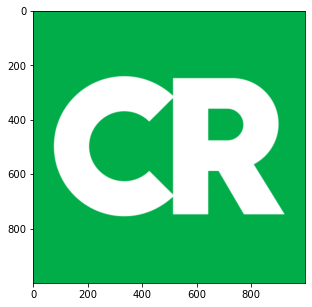

In [ ]:
# Read the of image of color CR logo (foreground).
img_logo = cv2.imread('CR_Logo.png', cv2.IMREAD_COLOR)

# Print the image shape.
print(img_logo.shape)
logo_h = img_logo.shape[0]
logo_w = img_logo.shape[1]

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_logo[:, :, ::-1]);

### <font style="color:rgb(50,120,230)">Read the background image (checkerboard) and print the shape</font>

In [ ]:
# Read the of image of color cheackerboad (background).
img_background = cv2.imread('checkerboard_color.png', cv2.IMREAD_COLOR)

# Print the image shape.
print(img_background.shape);

(900, 900, 3)


### <font style="color:rgb(50,120,230)">Resize the background image and display it</font>

(1000, 1000, 3)


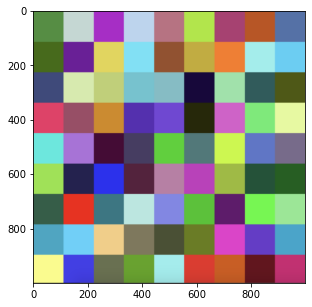

In [ ]:
# Set the dimension of the background image to be the same as the logo.
dim = (logo_w, logo_h)

# Resize the background image to the same size as logo image.
img_background = cv2.resize(img_background, dim, interpolation = cv2.INTER_AREA)

# Print the image shape to confirm it's the same size as the logo.
print(img_background.shape)

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_background[:, :, ::-1]);

### <font style="color:rgb(50,120,230)">Create a mask from the logo image</font>

(1000, 1000)


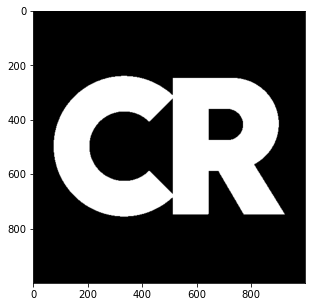

In [ ]:
# Convert the image to grayscale.
img_logo_gray = cv2.cvtColor(img_logo, cv2.COLOR_BGR2GRAY)

# Apply global thresholding to create a binary mask of the logo.
retval, img_logo_mask = cv2.threshold(img_logo_gray, 127, 255, cv2.THRESH_BINARY)

# Print the image shape.
print(img_logo_mask.shape);

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_logo_mask);

### <font style="color:rgb(50,120,229)">Apply the mask to the background image</font>

(1000, 1000, 3)


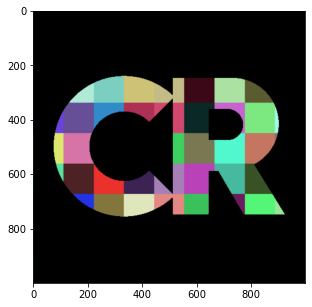

In [ ]:
# Create colorful checkerboard background "behind" the logo lettering.
img_background = cv2.bitwise_and(img_background, img_background, mask = img_logo_mask)

# Print the image shape.
print(img_background.shape);

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_background);

### <font style="color:rgb(50,120,230)">Invert the mask </font>

(1000, 1000)


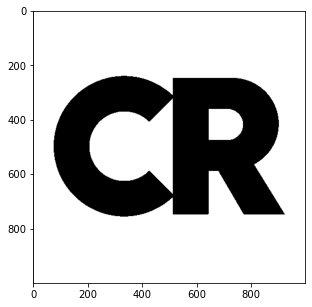

In [ ]:
# Create an inverse mask.
img_logo_mask_inv = cv2.bitwise_not(img_logo_mask)

# Print the image shape.
print(img_logo_mask_inv.shape)

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_logo_mask_inv);

### <font style="color:rgb(50,120,229)">Isolate the foreground of the logo</font>

(1000, 1000, 3)


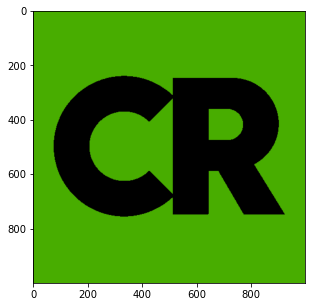

In [ ]:
# Isolate the foreground using the inverse mask.
img_foreground = cv2.bitwise_and(img_logo, img_logo, mask = img_logo_mask_inv)

# Print the image shape.
print(img_foreground.shape)

# Display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_foreground);

### <font style="color:rgb(50,120,229)">Final result: Add the Foreground and Background</font>

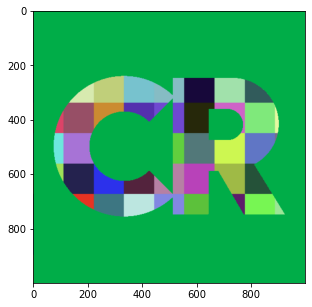

In [ ]:
# Add the two previous results to obtain the final result.
result = cv2.add(img_background,img_foreground)

# Display the image and save the the result to the file system.
plt.figure(figsize = [5, 5])
plt.imshow(result[:, :, ::-1])
cv2.imwrite('logo_final.png', result);

# 3. Exercise

Given the first two images, generate the 3rd image.

![Exercise-03-preview](https://opencv.org/wp-content/uploads/2021/08/c0-m2-Exercise-03-preview.png)

### <font style="color:rgb(50,120,230)">Read and display input images (completed for you)</font>

yellow square:  (600, 600, 3)
gray circle:    (1000, 1000, 3)


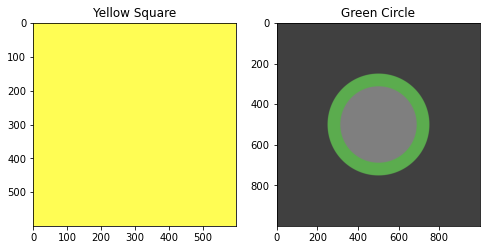

In [ ]:
# Read the image of a yellow square ('yellow_square.png')
img_yellow_square = cv2.imread('yellow_square.png', cv2.IMREAD_COLOR)

# Read the image of a green/gray circle inside square.
img_green_circle = cv2.imread('green_circle.png', cv2.IMREAD_COLOR)

print('yellow square: ', img_yellow_square.shape)
print('gray circle:   ', img_green_circle.shape)

# Display both input images using matplotlib imshow().
plt.figure(figsize = (8, 8))
plt.subplot(121); plt.imshow(img_yellow_square[:, :, ::-1]); plt.title('Yellow Square')
plt.subplot(122); plt.imshow(img_green_circle);              plt.title('Green Circle');

### <font style="color:rgb(50,120,230)">Resize the yellow square (completed for you)</font>

Before we can peform logical operations on these images, we need to make them the same size.

In [ ]:
# Resize the background (yellow) image to the same size as the grayscale image.
dim = (img_green_circle.shape[1], img_green_circle.shape[0])

# Resize the yellow square.
img_yellow_square = cv2.resize(img_yellow_square, dim, interpolation=cv2.INTER_AREA)

# Print the image sizes to confirm the width and height match.
print('yellow square: ', img_yellow_square.shape)
print('gray circle: ', img_green_circle.shape)

yellow square:  (1000, 1000, 3)
gray circle:  (1000, 1000, 3)


### <font style="color:rgb(50,120,230)">Coding exercise</font>

Please complete the code in the cells below.

In [ ]:
# Convert the green circle image to grayscale using cvtColor()
# YOUR CODE HERE
# img_gray_circle = 

# Use the threshold() function to create a binary mask (white RING inside a black square).
# Hint: You will need to CARFULLY choose a threshold value that isolates the light gray ring.
# YOUR CODE HERE
# retval, img_ring_mask = 

# Use the bitwise_not() function to create an inverse mask.
# YOUR CODE HERE
# img_ring_mask_inv = 

# Use bitwise_and() to create the final combined image (black ring on a yellow square)
# YOUR CODE HERE
# img_combined = 

# Display the images.
# UNCOMMENT THE LINES BELOW
# plt.figure(figsize = [20,10])
# plt.subplot(141); plt.imshow(img_gray_circle);          plt.title('Gray Scale Image')
# plt.subplot(142); plt.imshow(img_ring_mask);            plt.title('Mask')
# plt.subplot(143); plt.imshow(img_ring_mask_inv);        plt.title('Inverse Mask')
# plt.subplot(144); plt.imshow(img_combined[:, :, ::-1]); plt.title('Combined');

Your results should look like this.

![Exercise-02-03](https://opencv.org/wp-content/uploads/2021/08/c0-m2-Exercise-03.png)